In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [3]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the path to the ZIP file in Google Drive
zip_path = 'https://drive.google.com/file/d/1YvdQ0lsa5aqWB9OaLETU4oAfSDJckp5y/view?usp=sharing'  # Replace with the actual path to your ZIP file

In [5]:
import zipfile
import os
import gdown

# Step 1: Download the file from Google Drive
# Replace the part after 'id=' in the URL with the actual file ID.
file_id = '1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY'
zip_file_path = '/content/plant.zip'

# Downloading the file using gdown
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', zip_file_path, quiet=False)

# Step 2: Extract the zip file
extract_dir = '/content/plant'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extracted files
os.listdir(extract_dir)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY
From (redirected): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY&confirm=t&uuid=757795a4-841e-4649-961f-c8abe73487b1
To: /content/plant.zip
100%|██████████| 1.49G/1.49G [00:28<00:00, 52.4MB/s]


['Plant_Disease_Dataset', '__MACOSX']

In [6]:
# Load datasets
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

Found 70295 files belonging to 38 classes.


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

Found 17572 files belonging to 38 classes.


In [ ]:
# Build the ResNet50 model
base_model = tf.keras.applications.ResNet50(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model layers

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
import tensorflow as tf

# Define a base model, for example, using a pre-trained model like ResNet50
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to avoid training them
base_model.trainable = False

# Add custom layers on top of the base model
cnn = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(38, activation='softmax')  # Adjust output units to match the number of classes
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [12]:
# Build the ResNet50 model
base_model = tf.keras.applications.ResNet50(
    include_top=False, # Remove input_shape from here
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model layers

# Add custom layers, define input shape for Sequential model
cnn = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)), # Define input shape here
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(38, activation='softmax')  # Adjust output units to match the number of classes
])


# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,724,838 (98.13 MB)

 Trainable params: 2,137,126 (8.15 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [13]:
# Train the model
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 46ms/step - accuracy: 0.7101 - loss: 1.0616 - val_accuracy: 0.9395 - val_loss: 0.1979
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 43ms/step - accuracy: 0.9302 - loss: 0.2212 - val_accuracy: 0.9486 - val_loss: 0.1551
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 41ms/step - accuracy: 0.9520 - loss: 0.1482 - val_accuracy: 0.9575 - val_loss: 0.1257
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 91s 41ms/step - accuracy: 0.9637 - loss: 0.1083 - val_accuracy: 0.9611 - val_loss: 0.1154
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.9715 - loss: 0.0855 - val_accuracy: 0.9674 - val_loss: 0.0944
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 41ms/step - accuracy: 0.9790 - loss: 0.0666 - val_accuracy: 0.9680 - val_loss: 0.0930
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 41ms/step - accuracy: 0.9812 - loss: 0.0573 - val_accuracy: 0.9678 - val_loss: 0.0916
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 42ms/step - accuracy: 0.

In [ ]:
# Evaluate training and validation accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 75s 34ms/step - accuracy: 0.9977 - loss: 0.0128
Training accuracy: 0.9980226159095764
550/550 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9763 - loss: 0.0728
Validation accuracy: 0.9775210618972778


In [14]:
# Save the model
cnn.save('trained_resnet50_plant_disease_model.keras')

In [15]:
# Save training history to JSON
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

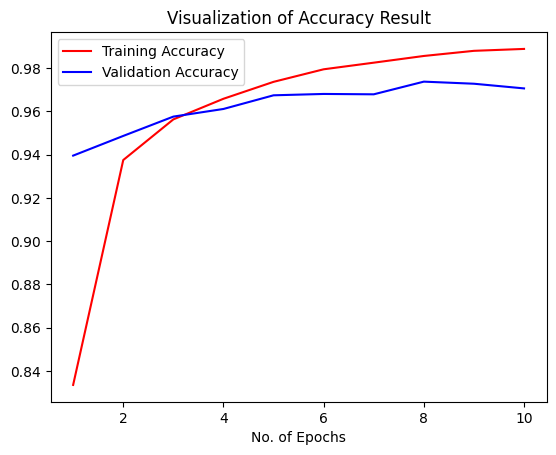

In [16]:
# Plot accuracy
epochs = range(1, 11)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [29]:
# Evaluate on test set
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=test_set.class_names))

Found 17572 files belonging to 38 classes.
17572/17572 ━━━━━━━━━━━━━━━━━━━━ 119s 7ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.99      0.99       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.99      0.98      0.98       502
                               Blueberry___healthy       0.99      1.00      0.99       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      0.99      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.78      0.99      0.87       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00

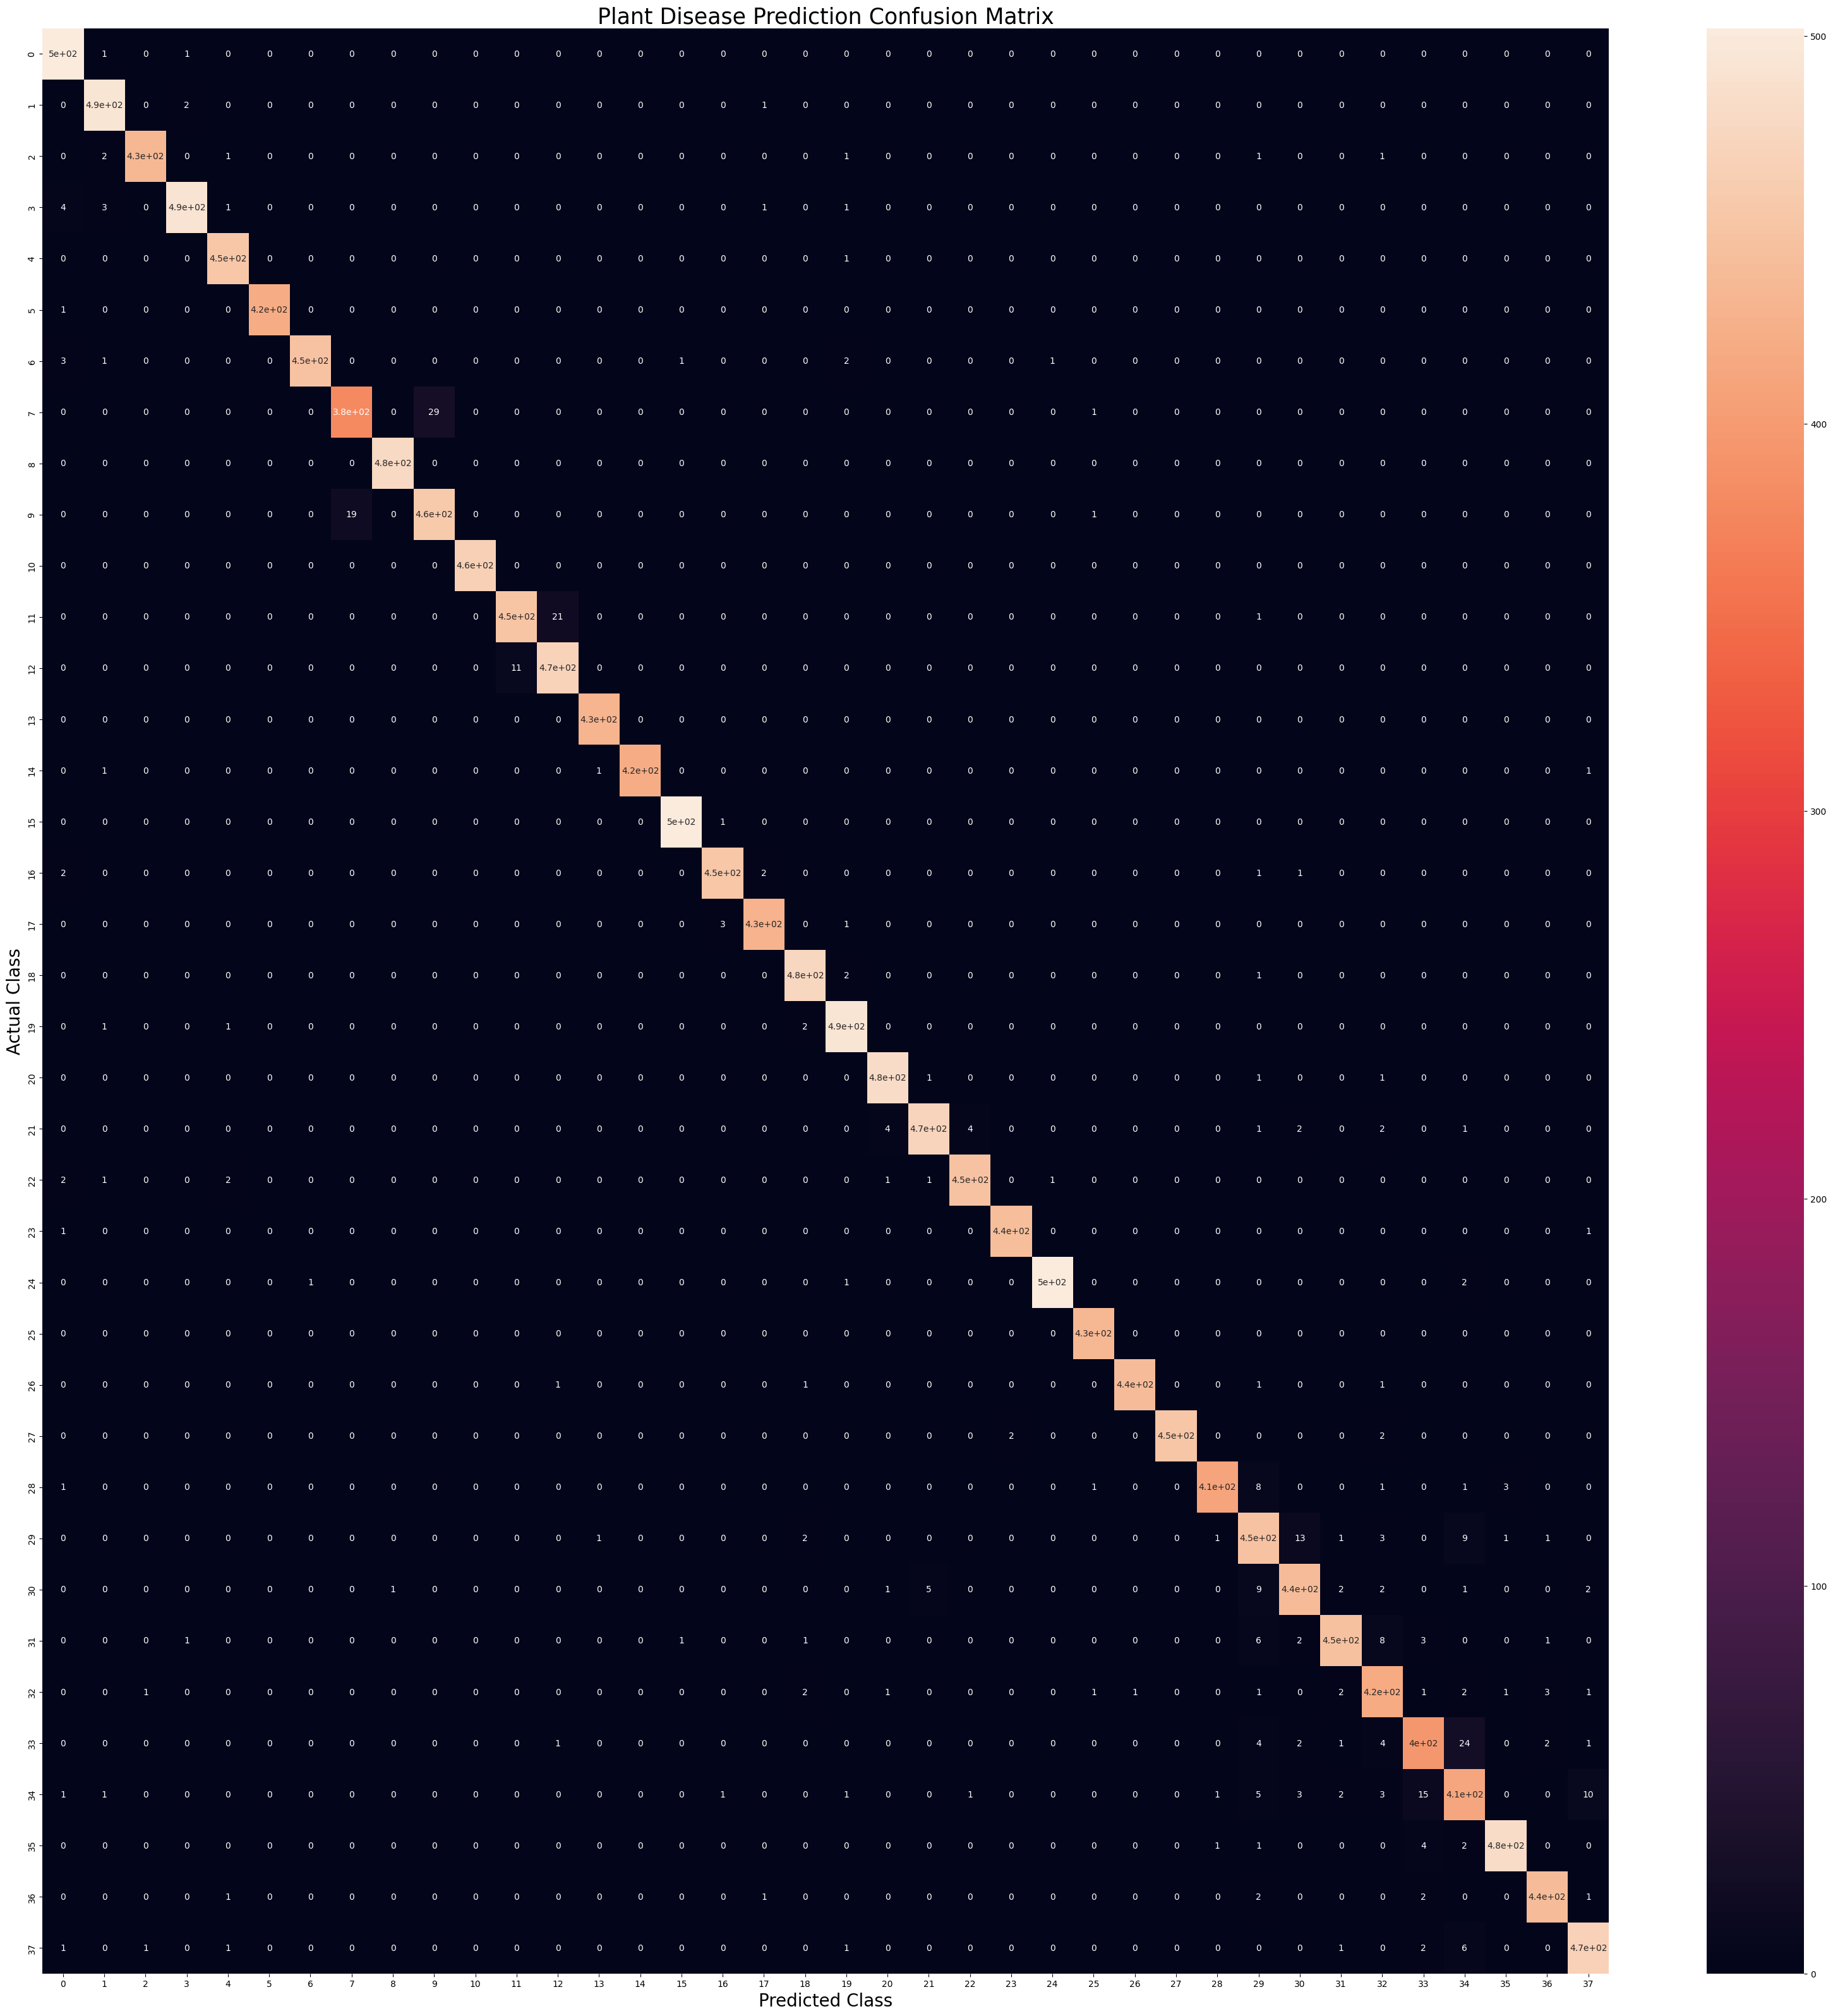

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()